# Hough Transform

The `Hough Transform` is a feature extraction technique used in `image analysis`, `computer vision`, and `digitial image processing`. The purpose of the technique is for detecting simple shapes such as lines, circles, etc in an image.

Here, we will know how it works and implement it with python.

## How to represent a line?

<img style="float:right;" src="img/line_parameterization.png" width="300" height="100"/>

A line can be represented one of the two forms:

(1) $ y = mx + b $ (`Cartesian coordinate system`)

(2) $ {\rho} = xcos(\theta) + ysin(\theta) $ (`Polar coordinate system`)

where:

```
• ρ (rho): The perpendicular distance from origin to the line.
• θ (theta): The angle formed by this perpendicular line and horizontal axis.
```

## Image, Parameter and Hough Space

- In `image space`, a line is plotted as `x vs. y`.
- In `parameter space`, a line can be represented by a point in `m vs. b`.

<img src="img/image_parameter_space_1.png"/>


In general, the straight line `y = mx + b` can be represented as a point (b, m) in the parameter space. However, the `slope m` would rise to `unbounded` (division by 0) when the line is vertical.

To overcome this, we use another parameter space, `hough space: (ρ, θ)`.

<img src="img/image_parameter_space_2.jpeg"/>



## Accumulator

It's a 2D matrix to hold values of two parameters, `ρ` and `θ`.

In accumulator (2D matrix), if we any pick a (ρ, θ), it corresponds to a line.
And the more curves intersect at a point the more `votes` a line in image space will receive.

<img src="img/accumulator.png" width="50%" height="50%">


### Size of Accumulator

<img src="img/size_of_accumulator.png" width="50%" height="50%">

As the image shows, we can know:

```
• θ (theta) ranges: [-90, 90]
• ρ (rho) ranges: [-max_dist, max_dist], where max_dist is the diagonal length of the image.
```

# Algorithm

In [1]:
# import all the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Corner or Edge detection

The resultant of the image that done by edge detection will have `0` indicating non-edges and `1(255)` indicating edges.

So, we use a binary image here.

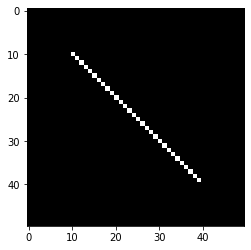

In [2]:
# Create binary image
img = np.zeros((50,50))

# np.eye(): return a 2-D array with ones on the diagonal 
#           and zeros elsewhere.
img[10:40, 10:40] = np.eye(30)
plt.imshow(img, cmap='gray')

## Initialize Accumulator

In [3]:
def init_accumulator(img):
    # rho and theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    height, width = img.shape
    # np.ceil(): return the celling(上限) of the input, element-wise.
    #            大於該數的最小整數
    diag_len = np.ceil(np.sqrt(np.square(width) + np.square(height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    
    # Initialize accumulator array of theta(column, x-axis) vs rho(row, y-axis)
    accumulator = np.zeros((2 * diag_len.astype(int), len(thetas)), dtype=np.uint64)
                           
    return (rhos, thetas, accumulator)

## Hough Transform

- Voting by edge pixels

In [4]:
def hough_line(img):
    rhos, thetas, accumulator = init_accumulator(img)
    
    diag_len = accumulator.shape[0] / 2
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    
    # (row, col) indexes to edges
    y_idxs, x_idxs = np.nonzero(img) 
    
    # vote in the accumulator matrix
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        
        for t_idx in range(len(thetas)):
            # calculate rho. 
            # `diag_len` is added for a positive index, 
            # because rho is (-diag_len to diag_len)
            rho = (round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len).astype(int)
            accumulator[rho, t_idx] += 1
    
    return (rhos, thetas, accumulator)

## Peak finding

In [5]:
# hough line
rhos, thetas, accumulator = hough_line(img)

# Easiest peak finding based on max votes
idx = np.argmax(accumulator) # idx = row x column
rho = rhos[idx // accumulator.shape[1]]
theta = thetas[idx % accumulator.shape[1]]
print("rho: {:.2f}, theta: {:.0f}".format(rho, np.rad2deg(theta)))

rho: 0.50, theta: -45


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


## Display results

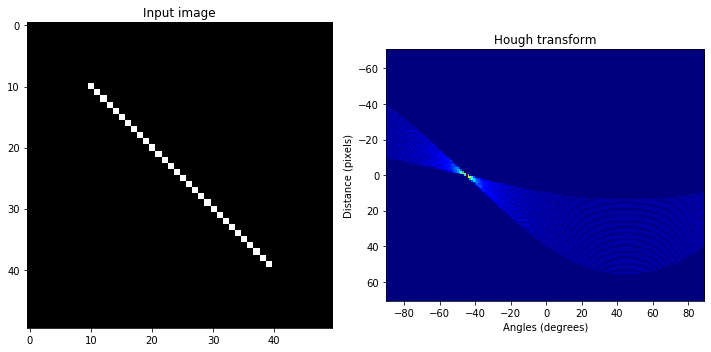

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Input image")
plt.axis("image")
plt.tight_layout()
plt.subplot(122)
plt.imshow(accumulator, cmap="jet",
    extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
plt.title("Hough transform")
plt.xlabel("Angles (degrees)")
plt.ylabel("Distance (pixels)")
plt.axis("image")
plt.tight_layout()

# Reference

- https://en.wikipedia.org/wiki/Hough_transform

- https://alyssaq.github.io/2014/understanding-hough-transform/#Extras

- https://www.learnopencv.com/hough-transform-with-opencv-c-python/